In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
test = pd.read_csv('../input/home-credit-default-risk/application_test.csv')

# Одномерный анализ

In [ ]:
print(train.shape)
train.sample(5)

In [ ]:
print(test.shape)
test.sample(5)

# Типы колонок

In [ ]:
train.dtypes

In [ ]:
test.dtypes

In [ ]:
cat_features = { "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
                        "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                        "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
                        "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
                        "WEEKDAY_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
                        "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE", 
                        "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", 
                        "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", 
                        "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", 
                        "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", 
                        "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"}
train["TARGET"] = train["TARGET"].astype("category")
for feature in cat_features:
    train[feature] = train[feature].astype("category")
    test[feature] = test[feature].astype("category")

# Пропущенная информация  

In [ ]:
print(train.isnull().sum())

In [ ]:
print(test.isnull().sum())

# Дубликаты

In [ ]:
train[train.duplicated()]

In [ ]:
test[test.duplicated()]

# Распределение

In [ ]:
num_features = train.select_dtypes(include = ['float64', 'int64']).columns
train[num_features].hist(figsize=(20, 40), color = 'r', bins=30, xlabelsize=8, ylabelsize=8)

In [ ]:
test[num_features].hist(figsize=(20, 40), color = 'b', bins=30, xlabelsize=8, ylabelsize=8)

# Outliers

In [ ]:
fig, axes = plt.subplots(nrows=len(num_features), ncols=1)
fig.set_size_inches(20, 120)
for i, col in enumerate(num_features):
    sns.boxplot(data=train[col], orient='h', ax=axes[i], color='r')
plt.show()

In [ ]:
train.describe()

In [ ]:
train[cat_features].describe()

In [ ]:
train.median()

In [ ]:
train.mean()

In [ ]:
fig, axes = plt.subplots(nrows=len(num_features), ncols=1)
fig.set_size_inches(20, 120)
for i, col in enumerate(num_features):
    sns.boxplot(data=test[col], orient='h', ax=axes[i], color='b')
plt.show()

In [ ]:
test.describe()

In [ ]:
test[cat_features].describe()

In [ ]:
test.median()

In [ ]:
test.mean()

# Матрица корелляции

In [ ]:
corrMatrix = train.corr()
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(180,90)
sns.heatmap(corrMatrix, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

# Подготовка данных

In [ ]:
delete_cols =  { "CNT_CHILDREN", 
                      "LIVINGAPARTMENTS_AVG",
                      "APARTMENTS_MODE",
                      "BASEMENTAREA_MODE",
                      "YEARS_BEGINEXPLUATATION_MODE",
                      "YEARS_BUILD_MODE",
                      "COMMONAREA_MODE",
                      "ELEVATORS_MODE",
                      "ENTRANCES_MODE",
                      "FLOORSMAX_MODE",
                      "FLOORSMIN_MODE",
                      "LANDAREA_MODE",
                      "LIVINGAPARTMENTS_MODE",
                      "LIVINGAREA_MODE",
                      "NONLIVINGAPARTMENTS_MODE",
                      "NONLIVINGAREA_MODE",
                      "APARTMENTS_MEDI",
                      "BASEMENTAREA_MEDI",
                      "YEARS_BEGINEXPLUATATION_MEDI",
                      "YEARS_BUILD_MEDI",
                      "COMMONAREA_MEDI",
                      "ELEVATORS_MEDI",
                      "ENTRANCES_MEDI",
                      "FLOORSMAX_MEDI",
                      "FLOORSMIN_MEDI",
                      "LANDAREA_MEDI",
                      "LIVINGAPARTMENTS_MEDI",
                      "LIVINGAREA_MEDI",
                      "NONLIVINGAPARTMENTS_MEDI",
                      "NONLIVINGAREA_MEDI",
                      "TOTALAREA_MODE",
                      "AMT_GOODS_PRICE",
                      "AMT_ANNUITY",
                      "ELEVATORS_AVG",
                      "APARTMENTS_AVG",
                      "BASEMENTAREA_AVG",
                      "OBS_30_CNT_SOCIAL_CIRCLE",
                      "DEF_30_CNT_SOCIAL_CIRCLE",
                      "LIVINGAREA_AVG"
                     }
for d in delete_cols:
    train.drop(d, inplace=True, axis=1)
    test.drop(d, inplace=True, axis=1)
    
num_features = train.select_dtypes(include = ['float64', 'int64']).columns

In [ ]:
corrMatrix = train.corr()
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(180,90)
sns.heatmap(corrMatrix, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

In [ ]:
train.drop("FLOORSMIN_AVG", inplace=True, axis=1)
test.drop("FLOORSMIN_AVG", inplace=True, axis=1)
num_features = train.select_dtypes(include = ['float64', 'int64']).columns

In [ ]:
corrMatrix = train.corr()
mask = np.array(corrMatrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(180,90)
sns.heatmap(corrMatrix, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

## Обработка пропущенных значений 

In [ ]:
print(train[num_features].isnull().sum()) 

In [ ]:
print(test[num_features].isnull().sum())

In [ ]:
col_del_candidate = { 'CNT_FAM_MEMBERS',  
                      'DAYS_LAST_PHONE_CHANGE'
                    }

train = train.dropna(subset=col_del_candidate)
train.fillna((train.median()), inplace=True)

test = test.dropna(subset=col_del_candidate)
test.fillna((test.median()), inplace=True)

In [ ]:
print(train[cat_features].isnull().sum()) 

In [ ]:
print(test[cat_features].isnull().sum()) 

In [ ]:
train[cat_features].describe()

In [ ]:
test[cat_features].describe()

## Добавляю новые типы для категориальных колонок

In [ ]:
cat_to_add = { 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE' }
for c in cat_to_add:
    train[c] = train[c].cat.add_categories('Unkown')
    train[c].fillna("Unkown")
    test[c] = test[c].cat.add_categories('Unkown')
    test[c].fillna("Unkown")

## Удаляю несколько категориальных фичерсов 

In [ ]:
cat_del_candidate = { "FLAG_MOBIL", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_7", 
                               "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_9","FLAG_DOCUMENT_12", 
                               "FLAG_CONT_MOBILE", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_17", 
                               "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_20",
                              "FLAG_DOCUMENT_21", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_15", 
                              "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_4",
                              "FLAG_DOCUMENT_6", "REG_REGION_NOT_LIVE_REGION", "FLAG_DOCUMENT_18",
                              "OCCUPATION_TYPE", "ORGANIZATION_TYPE", 
                              "WEEKDAY_APPR_PROCESS_START", "CODE_GENDER",
                              'NAME_TYPE_SUITE', 
                              'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'REG_REGION_NOT_WORK_REGION', 
                               'REGION_RATING_CLIENT_W_CITY', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 
                               'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE' } 
for d in cat_del_candidate:
    train.drop(d, inplace=True, axis=1)
    test.drop(d, inplace=True, axis=1)

cat_features = cat_features - cat_del_candidate
train[cat_features].describe()

In [ ]:
test[cat_features].describe()

## One-Hot кодирование для некоторых фичерсов

In [ ]:
one_hot_enc = { "NAME_CONTRACT_TYPE", "FLAG_EMP_PHONE", 'REG_CITY_NOT_LIVE_CITY', 'FLAG_OWN_CAR', 
                          'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'LIVE_REGION_NOT_WORK_REGION', 
                          'LIVE_CITY_NOT_WORK_CITY', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_3', 'FLAG_PHONE', 
                          'FLAG_DOCUMENT_8', 'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT'
                         }

train = pd.get_dummies(train, columns=one_hot_enc, prefix = one_hot_enc)
test = pd.get_dummies(test, columns=one_hot_enc, prefix = one_hot_enc)

## Label encoding для NAME_EDUCATION_TYPE

In [ ]:
train['NAME_EDUCATION_TYPE'] = train['NAME_EDUCATION_TYPE'].cat.codes
test['NAME_EDUCATION_TYPE'] = test['NAME_EDUCATION_TYPE'].cat.codes

In [ ]:
train.describe()

In [ ]:
test.describe()

## Новые распределения

In [ ]:
num_features = train.select_dtypes(include = ['float64', 'int64']).columns
num_features_test = test.select_dtypes(include = ['float64', 'int64']).columns

In [ ]:
train[num_features].hist(figsize=(20, 40), color = 'r', bins=30, xlabelsize=8, ylabelsize=8)

In [ ]:
test[num_features_test].hist(figsize=(20, 40), color = 'b', bins=30, xlabelsize=8, ylabelsize=8)

## Удаляю невалидные фичерсы 

In [ ]:
num_del_candidate = { "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "OBS_60_CNT_SOCIAL_CIRCLE", 
                               "DEF_60_CNT_SOCIAL_CIRCLE", "YEARS_BEGINEXPLUATATION_AVG","AMT_REQ_CREDIT_BUREAU_HOUR", 
                               "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_QRT" } 
for d in num_del_candidate:
    train.drop(d, inplace=True, axis=1)
    test.drop(d, inplace=True, axis=1)

In [ ]:
train.describe()

In [ ]:
test.describe()

## Балансируем данные в train датасете

In [ ]:
train = train.drop(train[train.TARGET == 0].index).append(train.drop(train[train.TARGET == 1].index).sample(50_000))

# Обучение

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
train["TARGET"] = train["TARGET"].astype("category")
num_features = train.select_dtypes(include = ['float64', 'int64', 'uint8']).columns

In [ ]:
X_test = test[num_features]
X_train, X_val, y_train, y_val = train_test_split(train[num_features], train["TARGET"], test_size=0.33, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [ ]:
lr = LogisticRegression(solver="newton-cg", random_state=0).fit(X_train, y_train)
roc_auc_score(y_val, lr.predict_proba(X_val)[:, 1])


In [ ]:
sub_1 = pd.DataFrame(test['SK_ID_CURR'])
sub_1['TARGET'] = lr.predict_proba(X_test)[:, 1]

In [ ]:
sub_1.to_csv('log_reg.csv', index = False)

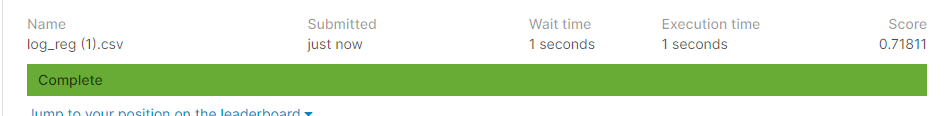